<a href="https://colab.research.google.com/github/kkarennx/1948959_AI/blob/main/Final_Project_Team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PIA**

Members:
1.   Ana Karen Martínez Álvarez 1948959
2.   Luis Eduardo Perez Guerrero 1945463
1.   Selene Guadalupe Carrillo Chávez 1918691
2.   Adrián Aimar Avila Sánchez 1956344

In [ ]:
# Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from zipfile import ZipFile
from google.colab import files

In [ ]:
# Kaggle API library
!pip install kaggle

# Kaggle API key (kaggle.json)
from google.colab import files

# Upload the kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Moving the uploaded key to the required location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the skin lesion dataset
!kaggle datasets download -d wanderdust/skin-lesion-analysis-toward-melanoma-detection

100% 11.3G/11.3G [02:01<00:00, 154MB/s]
100% 11.3G/11.3G [02:01<00:00, 99.6MB/s]


In [ ]:
import zipfile

# Unzip the downloaded dataset
with zipfile.ZipFile('/content/skin-lesion-analysis-toward-melanoma-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/skin-lesion-dataset')


**Preprocessing**

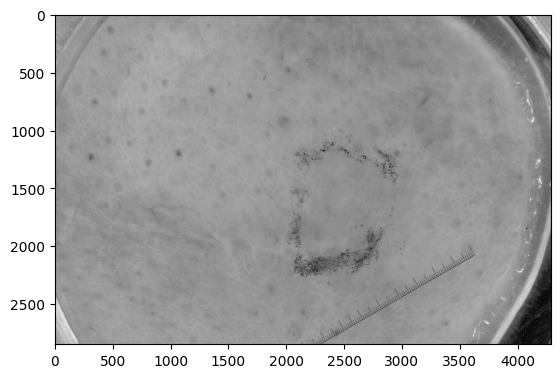

In [ ]:
# Load images
file = '/content/skin-lesion-dataset/skin-lesions/test/melanoma/ISIC_0012258.jpg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

# Image preview
plt.imshow(test_image, cmap='gray')

In [ ]:
# Paths to the dataset
data_train_path = '/content/skin-lesion-dataset/skin-lesions/train'
data_valid_path = '/content/skin-lesion-dataset/skin-lesions/valid'
data_test_path = '/content/skin-lesion-dataset/skin-lesions/test'

# Define classes globally
classes = ['melanoma', 'nevus', 'seborrheic_keratosis']
# Load and preprocess images
def load_and_preprocess_data(data_path, target_size=(128, 128)):
    images = []
    labels = []

    for label in classes:
        label_path = os.path.join(data_path, label)
        if os.path.exists(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img, target_size)  # Redimensionar a (128, 128)
                img_resized = cv2.bitwise_not(img_resized)  # Invertir la imagen
                images.append(img_resized)
                labels.append(classes.index(label))  # Utilizar el índice como etiqueta (0, 1, 2)

    return np.array(images) / 255.0, np.array(labels)

# Load and preprocess training data
train_images, train_labels = load_and_preprocess_data(data_train_path)

# Load and preprocess validation data
valid_images, valid_labels = load_and_preprocess_data(data_valid_path)

# Load and preprocess test data
test_images, test_labels = load_and_preprocess_data(data_test_path)

Structure and training of Convolutional Artificial Neural Network (CNN)

In [ ]:
# Convolutional part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

# Learning part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Model Compilation: Features
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# CNN training
history = model.fit(train_images.reshape(-1, 128, 128, 1), train_labels, epochs=10,
                    validation_data=(valid_images.reshape(-1, 128, 128, 1), valid_labels))


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

CNN Accuracy Results

19/19 - 4s - loss: 0.8143 - accuracy: 0.6567 - 4s/epoch - 198ms/step

Test Accuracy: 0.6566666960716248


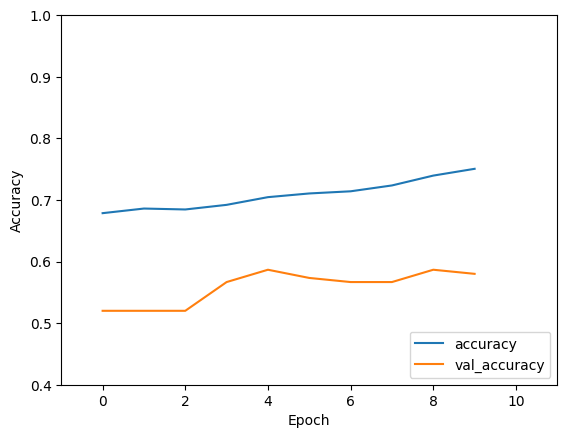

In [ ]:
# Plot with the difference in accuracy values from training and validation.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 128, 128, 1), test_labels, verbose=2)

# Display test accuracy
print(f"\nTest Accuracy: {test_acc}")


Predictions with the trained CNN (At least 5 predictions)

In [ ]:
# Generate predictions for the test set
predictions = model.predict(test_images.reshape(-1, 128, 128, 1))

19/19 [==============================] - 4s 205ms/step


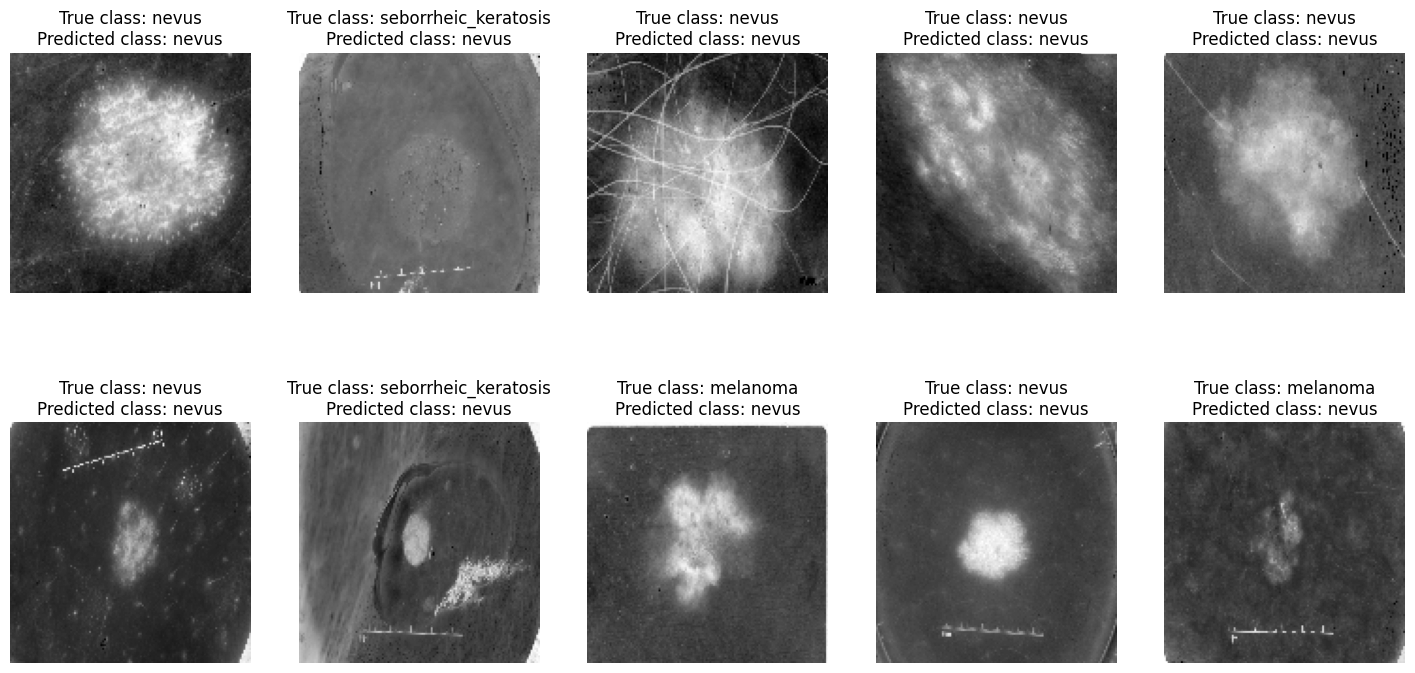

In [ ]:
# Display predictions for 10 images in a 5x2 grid
num_rows, num_cols = 2, 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))
fig.subplots_adjust(hspace=0.5)

for i in range(num_rows):
    for j in range(num_cols):
        index = np.random.randint(len(test_images))
        prediction = predictions[index]
        true_label = classes[test_labels[index]]
        predicted_label = get_class_label(prediction)

        # Display the image
        axes[i, j].imshow(test_images[index], cmap='gray')
        axes[i, j].set_title(f"True class: {true_label}\nPredicted class: {predicted_label}")
        axes[i, j].axis('off')

plt.show()


t-SNE visualization plot: provides a visual representation of the clustering of images based on the model predictions. Its particularly useful for understanding how well the model generalizes to different classes and whether it exhibits clear distinctions between them.

19/19 [==============================] - 4s 237ms/step


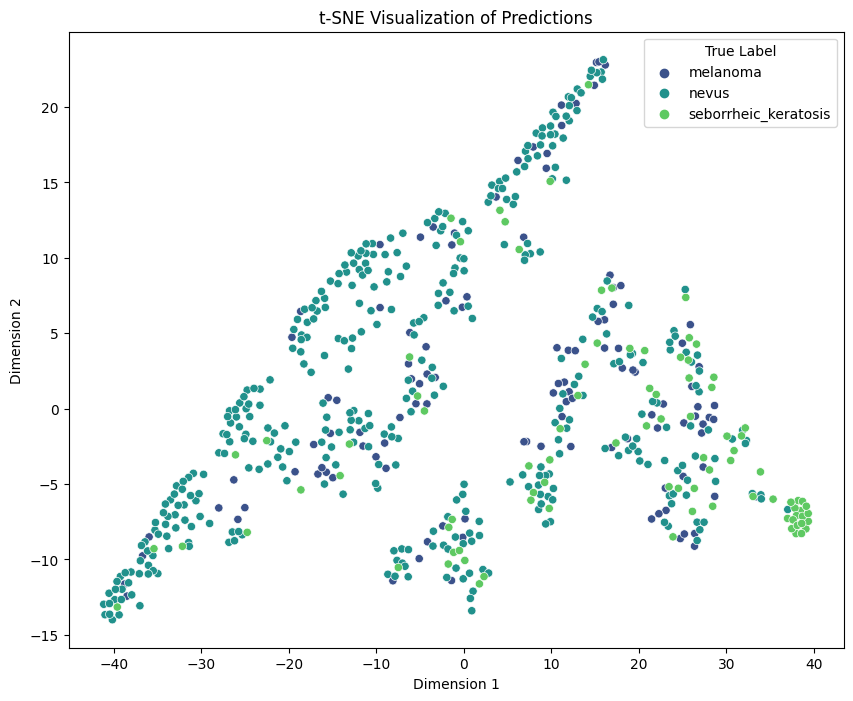

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Generate predictions for the entire test set
all_predictions = model.predict(test_images.reshape(-1, 128, 128, 1))

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(all_predictions)

# Create a DataFrame with the t-SNE results and true labels
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['True Label'] = [classes[label] for label in test_labels]

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='True Label', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Predictions')
plt.show()
